In [17]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import json
import numpy as np
import pyodbc
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000



In [9]:
path=Path()
parent_path=str(path.parent.absolute())[:-10]

In [11]:
data = pd.read_csv(parent_path+"/data/csvs/hmda_2017_ca_noname.csv")
print(data.columns)
#print(data['action_taken'])

Index(['as_of_year', 'respondent_id', 'agency_abbr', 'agency_code',
       'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy',
       'loan_amount_000s', 'preapproval', 'action_taken', 'msamd',
       'state_abbr', 'state_code', 'county_code', 'census_tract_number',
       'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1',
       'applicant_race_2', 'applicant_race_3', 'applicant_race_4',
       'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2',
       'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5',
       'applicant_sex', 'co_applicant_sex', 'applicant_income_000s',
       'purchaser_type', 'denial_reason_1', 'denial_reason_2',
       'denial_reason_3', 'rate_spread', 'hoepa_status', 'lien_status',
       'edit_status', 'sequence_number', 'population', 'minority_population',
       'hud_median_family_income', 'tract_to_msamd_income',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'appl

In [13]:
js_road=parent_path+"/src/data_processing/code_map.json"
with open(js_road, 'r') as fh:
    code_map=json.load(fh)
    for i in code_map.keys():
        code_map[i]={int(m):n for m, n in code_map[i].items()}

In [83]:
image_path=parent_path+'/result/eda/income_analysis/'
if not os.path.exists(image_path):
    os.makedirs(image_path)

In [22]:

# Accp income distribution
# Deny income distribution
accp = income.loc[(income['action_taken'] == 1) | (income['action_taken'] == 2) | (income['action_taken'] == 8)]
deny = income.loc[(income['action_taken'] == 3) | (income['action_taken'] == 7)]
print(accp)
print(deny)
#print(income.groupby(['action_taken_name'])['applicant_income_000s'].avg())



#print(df)
fig = plt.figure(figsize =(100, 7))
#avg.plot(x='action_taken',y='applicant_income_000s',kind='bar')
plt.show()
'''

plt.pie(df, labels = cars)
hist_accp = accp.hist(bins=100)
print(hist_accp)
hist_deny = deny.hist(bins=2)
print(hist_deny)

'''


         applicant_income_000s  action_taken                action
2                        278.0             1  Institution approved
4                         86.0             2  Institution approved
5                         97.0             1  Institution approved
6                        143.0             1  Institution approved
9                         90.0             1  Institution approved
...                        ...           ...                   ...
1157534                    NaN             2  Institution approved
1157535                    NaN             2  Institution approved
1157536                    NaN             2  Institution approved
1157537                    NaN             2  Institution approved
1157538                    NaN             2  Institution approved

[931357 rows x 3 columns]
         applicant_income_000s  action_taken              action
0                        144.0             3  Institution denied
1                         51.0         

<Figure size 7200x504 with 0 Axes>

'\n\nplt.pie(df, labels = cars)\nhist_accp = accp.hist(bins=100)\nprint(hist_accp)\nhist_deny = deny.hist(bins=2)\nprint(hist_deny)\n\n'

In [76]:
def divi(x):
    if x >=500:
        return 500000
    elif x==x: 
        flor = x//30
        return flor*30000
    else:
        return -1

In [77]:
accp['applicant_income_000s'].apply(divi).value_counts().sort_index()

-1.0          51616
 0.0          17254
 30000.0     120573
 60000.0     193085
 90000.0     163872
 120000.0    114190
 150000.0     77068
 180000.0     51215
 210000.0     33639
 240000.0     24008
 270000.0     16846
 300000.0     13044
 330000.0      9329
 360000.0      7101
 390000.0      5412
 420000.0      4241
 450000.0      3693
 480000.0      1992
 500000.0     23179
Name: applicant_income_000s, dtype: int64

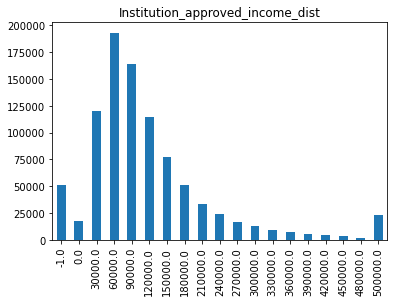

In [87]:
accp['applicant_income_000s'].apply(divi).value_counts().sort_index().plot.bar(title='Institution_approved_income_dist')
plt.savefig(image_path+'Institution_approved_income_dist.png',bbox_inches='tight')

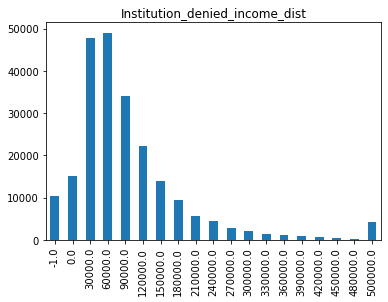

In [88]:
deny['applicant_income_000s'].apply(divi).value_counts().sort_index().plot.bar(title='Institution_denied_income_dist')
plt.savefig(image_path+'Institution_denied_income_dist.png',bbox_inches='tight')

<ipython-input-90-e51ffa32f9a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_b['action']= income['action_taken'].replace(RecodeAction)
<ipython-input-90-e51ffa32f9a7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_b['income_group'] = income_b['applicant_income_000s'].apply(divi)


         applicant_income_000s  action_taken                action  \
0                        144.0             3    Institution denied   
1                         51.0             3    Institution denied   
2                        278.0             1  Institution approved   
3                        125.0             3    Institution denied   
4                         86.0             2  Institution approved   
...                        ...           ...                   ...   
1157690                    NaN             3    Institution denied   
1157691                    NaN             3    Institution denied   
1157692                    NaN             3    Institution denied   
1157693                    NaN             3    Institution denied   
1157694                    NaN             3    Institution denied   

         income_group  
0            120000.0  
1             30000.0  
2            270000.0  
3            120000.0  
4             60000.0  
...            

<Figure size 432x288 with 0 Axes>

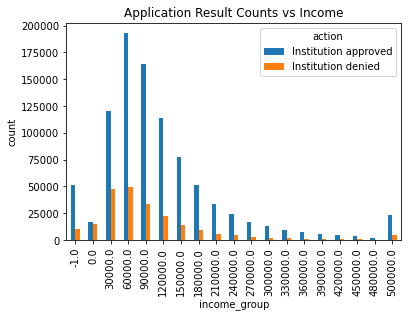

In [90]:
income = data[['applicant_income_000s','action_taken']]
#print(income)
RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
income_b=income
income_b['action']= income['action_taken'].replace(RecodeAction)


income_b['income_group'] = income_b['applicant_income_000s'].apply(divi)
print(income_b)
income_a1=income_b.pivot_table(index='income_group', columns='action',aggfunc='size',fill_value=0)
plt.figure()
income_a1.plot.bar(title='Application Result Counts vs Income')
plt.ylabel('count')
plt.savefig(image_path+'Application Result Counts vs Income.png',bbox_inches='tight')
#plt.xticks(rotation=360)